In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_excel("files/Dataset_ecommerce.xlsx")

In [4]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   InvoiceDate   406829 non-null  datetime64[ns]
 2   CustomerID    406829 non-null  object        
 3   StockCode     406829 non-null  object        
 4   Description   406829 non-null  object        
 5   Quantity      406829 non-null  int64         
 6   UnitPrice     406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   Revenue       406829 non-null  float64       
 9   InvoiceMonth  406829 non-null  period[M]     
 10  CohortMonth   406829 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](2)
memory usage: 37.2+ MB


In [6]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [49]:
data.dropna(inplace = True)

In [50]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [51]:
data.duplicated().sum()

np.int64(0)

In [18]:
num_col = [column for column in data.columns if data[column].dtypes != "O"]
cat_col= [column for column in data.columns if data[column].dtypes == "O"]


print(f"Numerical Columns are: {num_col}")
print(f"Categorical Columns are: {cat_col}")

Numerical Columns are: ['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice']
Categorical Columns are: ['InvoiceNo', 'StockCode', 'Description', 'Country']


In [ ]:
i = 1
for col in data.columns:
    print(f"{i}. {col} Column has {data[col].nunique()} unique values")
    print(10*"--")
    i += 1

1. InvoiceNo Column has 22190
--------------------
2. InvoiceDate Column has 20460
--------------------
3. CustomerID Column has 4372
--------------------
4. StockCode Column has 9000
--------------------
5. Description Column has 10
--------------------
6. Quantity Column has 100
--------------------
7. UnitPrice Column has 9901
--------------------
8. Country Column has 28
--------------------


In [41]:
data[data["InvoiceNo"].astype(str).str.startswith("C")]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
141,C536379,2010-12-01 09:41:00,14527.0,SC1351,Toys,35,38.86,Zambia
154,C536383,2010-12-01 09:49:00,15311.0,SC8496,Books,66,22.22,Zambia
235,C536391,2010-12-01 10:24:00,17548.0,SC6021,Kitchenware,21,35.02,Tunisia
236,C536391,2010-12-01 10:24:00,17548.0,SC9222,Jewelry,19,36.33,Morocco
237,C536391,2010-12-01 10:24:00,17548.0,SC5519,Electronics,40,42.14,Libya
...,...,...,...,...,...,...,...,...
540449,C581490,2011-12-09 09:57:00,14397.0,SC1491,Electronics,80,3.27,Benin
541541,C581499,2011-12-09 10:28:00,15498.0,SC4464,Furniture,89,31.80,Libya
541715,C581568,2011-12-09 11:57:00,15311.0,SC8355,Books,31,7.54,Ethiopia
541716,C581569,2011-12-09 11:58:00,17315.0,SC7751,Sports Equipment,28,26.03,Benin


In [59]:
data["CustomerID"] = data["CustomerID"].astype("int64").astype(str)

In [104]:
data["InvoiceMonth"] = data["InvoiceDate"].dt.to_period("M")

In [56]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]

In [61]:
num_transactions = data["InvoiceNo"].nunique()
num_customers = data["CustomerID"].nunique()
num_products = data["StockCode"].nunique()

In [62]:
print(f"The number of Transactions are: {num_transactions}")
print(f"The number of Customers are: {num_customers}")
print(f"The number of Products are: {num_products}")


The number of Transactions are: 22190
The number of Customers are: 4372
The number of Products are: 9000


In [64]:
data[data["Quantity"] < 0]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue


In [65]:
data[data["UnitPrice"] < 0]


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue


In [105]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12


In [106]:
date_range = (data["InvoiceDate"].max(), data["InvoiceDate"].min())
print(f"Transaction Period is {date_range[1]} - {date_range[0]}")

Transaction Period is 2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [90]:
top_countries = data.groupby("Country")["CustomerID"].nunique().sort_values(ascending = False)
top_countries.head()

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64

/var/folders/ft/2zwfql7s71b3l_6vlgqhyhvr0000gn/T/ipykernel_64854/1747966694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_countries.index, x = top_countries.values, palette = "viridis")


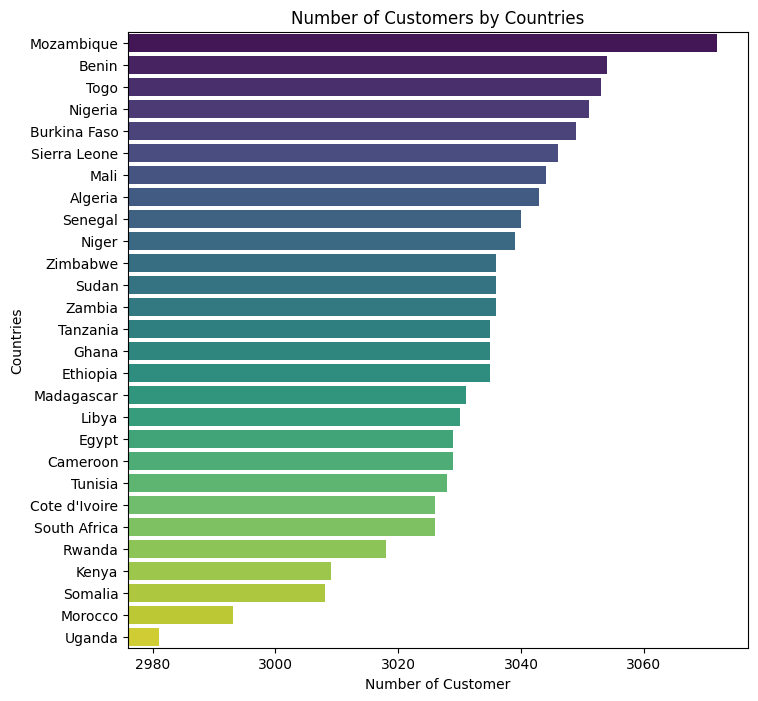

In [103]:
plt.figure(figsize = (8, 8))
plt.xlim(min(top_countries.values) - 5, max(top_countries.values) + 5)
sns.barplot(y = top_countries.index, x = top_countries.values, palette = "viridis")
plt.title("Number of Customers by Countries")
plt.ylabel("Countries")
plt.xlabel("Number of Customer")
plt.show()


In [109]:
monthly_sales = data.groupby("InvoiceMonth")["Revenue"].sum()
monthly_sales

InvoiceMonth
2010-12    6.792367e+07
2011-01    5.582933e+07
2011-02    5.208536e+07
2011-03    7.137210e+07
2011-04    5.914003e+07
2011-05    7.434151e+07
2011-06    7.109639e+07
2011-07    7.040789e+07
2011-08    6.994326e+07
2011-09    1.036281e+08
2011-10    1.287425e+08
2011-11    1.677331e+08
2011-12    4.519251e+07
Freq: M, Name: Revenue, dtype: float64

In [118]:
monthly_sales.index = monthly_sales.index.astype(str)

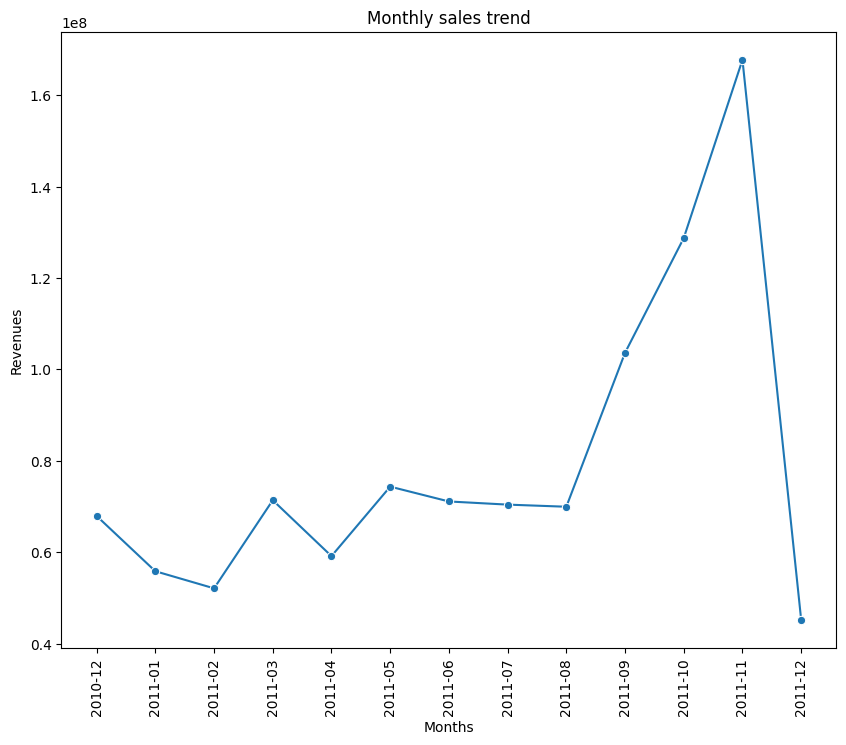

In [126]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = monthly_sales.index, y = monthly_sales.values, marker = "o", )
plt.title("Monthly sales trend")
plt.ylabel("Revenues")
plt.xlabel("Months")
plt.xticks(rotation = 90)
plt.show()


In [127]:
# cohort Analysis

In [142]:
first_purchase = data.groupby("CustomerID")["InvoiceMonth"].min().rename("CohortMonth")

In [131]:
data = data.join(first_purchase, on = "CustomerID")

In [132]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-12


In [144]:
invoice_year, invoice_month = data["InvoiceMonth"].dt.year, data["InvoiceMonth"].dt.month
cohort_year, cohort_month = data["CohortMonth"].dt.year, data["CohortMonth"].dt.month

In [145]:
cohort_index = ((invoice_year - cohort_year)* 12 + (invoice_month - cohort_month)) + 1

In [148]:
data["CohortIndex"] = cohort_index

In [149]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-12,1


In [155]:
cohort_table = data.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].nunique().reset_index()
cohort_table = cohort_table.pivot_table(index = "CohortMonth", columns = "CohortIndex", values = "CustomerID")
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
